# The Central Limit Theorem - A first approach

## 📚  1) Introduction to the CLT

🚀  **Two convergence theorems revolutionized the disciplines of probability and statistics:**
- **`LLN`: the Law of Large Numbers**
- **`CLT`: the Central Limit Theorem**

🧑🏻‍🏫  What is the CLT ? According to [Wikipedia](https://en.wikipedia.org/wiki/Central_limit_theorem)

> The CLT states that when independent random variables are summed up, their normalized sum tends towards a **`Gaussian distribution`**  even if the original variables themselves were not normally distributed.

> The Gaussian distribution is also known as a **`Normal Distribution`** or a **`bell curve`**.


<details>
    <summary>Why is the CLT a key concept of probability theory?</summary>
    
👉   Because it implies that probabilistic and statistical methods that work for normal distributions can be applicable to many problems involving other types of distributions.
    
🤔   Not clear for you yet ? No problem, we will elaborate on this during the `Decision Science - Inferential Statistics` chapter
    
As we love to say at ***`Le Wagon`***, ***Trust the process!***
    
</details>

🎯  Let's illustrate how to use the [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) in a dataset:

* Given a population, let's consider a feature (example: size, weight, salary, etc...) for each individual.


🚀  The important takeaway of these two theorems is that **whatever the shape of the distribution** of a given feature over the population **is**, **the distribution of the (sampled) mean<u>S</u> tends to be Gaussian**:
* `the mean of the means` = $ \mu$ (Law of Large Numbers)
* `the standard deviation of the means` = $ \frac{\sigma}{\sqrt{n}} $  (Central Limit Theorem)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7b/IllustrationCentralTheorem.png/400px-IllustrationCentralTheorem.png)

💡  We can wrap it up the following way:

$$ \large \bar{X} \approx_{n \rightarrow \infty} \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}}) $$

Not convinced?  Play by yourself with this [no-code dataviz tool](https://seeing-theory.brown.edu/probability-distributions/) first! 
 (section CTL)

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/ctl_playground.png" width=500>


👩🏻‍🔬  Now, let's verify this experimentally with Python!

---

## 🔢  2) The Dataset

👉 In this challenge, we will use the `tips` dataset from the `seaborn` library to illustrate the Central Limit Theorem.

In [1]:
# --- Data Manipulation ---
import numpy as np
import pandas as pd

# --- Data Visualization ---
import seaborn as sns
import matplotlib.pyplot as plt

# --- Maths ---
import math

In [2]:
tips_df = sns.load_dataset('tips')
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### 🧐  2.1) Exploratory Data Analysis (EDA)

❓ How many rows are available in the dataset ❓

In [11]:
tips_df.shape

tips_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


❓ Plot the distribution of the `tip` column 📊 (with 20 bins) ❓

<Axes: title={'center': 'Distribution des pourboires'}, ylabel='Frequency'>

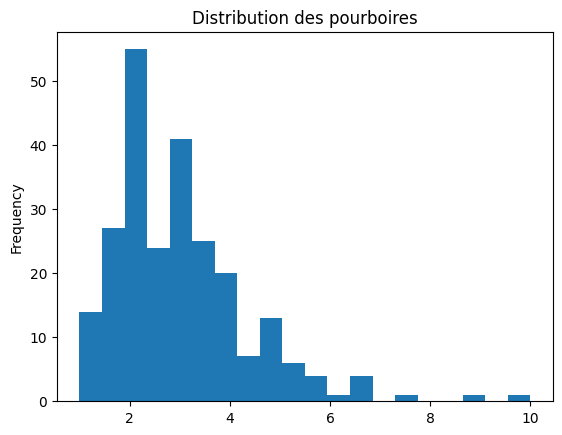

In [42]:
tips_df['tip'].plot(kind='hist', bins=20, title='Distribution des pourboires')

❓ Question 1 ❓

What are :
* the ***average tip***
* the ***standard deviation tip*** 
* the  [***skewness of the tips***](https://en.wikipedia.org/wiki/Skewness)

of the tips? 

Store them into three variables called respectively `tips_mu`, `tips_sigma` and `tips_skew`

In [19]:
tips_mu=tips_df["tip"].mean()
tips_sigma = tips_df["tip"].std()   
tips_skew = tips_df["tip"].skew()

tips_mu, tips_sigma, tips_skew

(2.99827868852459, 1.3836381890011822, 1.4654510370979401)

❓ Question 2 ❓

What is the skewness of the tips: left, right, non-skewed? Store your answer in a string variable called `skewness`

In [22]:
skewness="right"

In [23]:
tips_df.tip.describe()

count    244.000000
mean       2.998279
std        1.383638
min        1.000000
25%        2.000000
50%        2.900000
75%        3.562500
max       10.000000
Name: tip, dtype: float64

<details>
    <summary>Answer for the question related to the skewness:</summary>

* the "mode" seems to be around 2 dollars `(we can't really talk about a mode for a continuous variable but just looking at the histogram with 20 bins, we can give an estimation)
    
* the "mean" is at 2.99 dollars
    
* the median is at 2.90 dollars
    
So here we have $ mode < median < mean $ which correspond to a `right skewness` if you go back to the `Statistics and Probability` slides 😉
    
    
</details>

 🧪 **Test your code**

In [25]:
from nbresult import ChallengeResult

result = ChallengeResult('distribution',
    skewness=skewness,
    mu=tips_mu,
    sigma=tips_sigma
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/02-Data-Toolkit/04-Statistics-Probabilities/data-central-limit-theorem/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 5 items

test_distribution.py::TestDistribution::test_mean_is_a_float PASSED      [ 20%]
test_distribution.py::TestDistribution::test_mean_value PASSED           [ 40%]
test_distribution.py::TestDistribution::test_skewness_is_right PASSED    [ 60%]
test_distribution.py::TestDistribution::test_standard_deviation_is_a_float PASSED [ 80%]
test_distribution.py::TestDistribution::test_standard_deviation_value PASSED [100%]

============================== 5 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/distribution.pickle

git commit

### 🎲 2.2) Sampling mean

❓ Pick randomly - and with replacement - 10 rows of the dataset, and compute the mean $\bar{X}$ of that sample ❓

👉 Run the cell a few times. Do you get the same result each time? Is this expected?

In [40]:
sample = tips_df.sample(n=10, replace=True)
sample["tip"].mean() 

3.563

---

## 🔥 3) Applying the CLT

### 3.1) <u>Graphically</u>

👉 Create a `means` list storing a list of means of $N$ samples of size $n$.

Start with $n = 5$ and $N = 10$

📊  In the same cell, **plot** the distribution of `means`. 

🧐 Let's play with the <u>*sample size n*</u> and the <u>*number of samples N</u>*:
* Keep $n$ constant, increase $N$ and observe. What do you conclude?

(array([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 2., 1., 1., 0., 1., 1., 0.,
        0., 0., 1.]),
 array([1.984 , 2.0676, 2.1512, 2.2348, 2.3184, 2.402 , 2.4856, 2.5692,
        2.6528, 2.7364, 2.82  , 2.9036, 2.9872, 3.0708, 3.1544, 3.238 ,
        3.3216, 3.4052, 3.4888, 3.5724, 3.656 ]),
 <BarContainer object of 20 artists>)

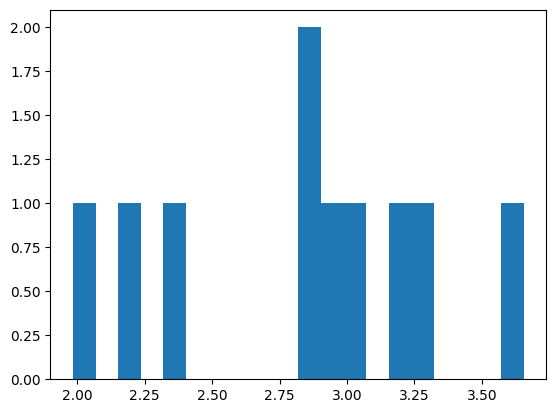

In [51]:
import matplotlib.pyplot as plt

n = 5   # taille d’un échantillon
N = 10  # nombre d’échantillons

means = []  # liste vide pour stocker les moyennes

for i in range(N):
    sample = tips_df.sample(n=n, replace=True)  # tire n lignes au hasard
    means.append(sample["tip"].mean())          # ajoute la moyenne du sample

plt.hist(means, bins=20)

<details>
    <summary>What is happening when <u><i>n is fixed</i></u> and <u><i>N increases</i></u>?</summary>

* `N` (how many times we sample) controls the random noise. 

* When large enough, histograms always look the same when you re-run the cell. To convince yourself, re-run the previous cell several times with with N = 5000

</details>

* Now, keep $N$ constant, increase $n$ and observe. What do you conclude?

<Axes: ylabel='Count'>

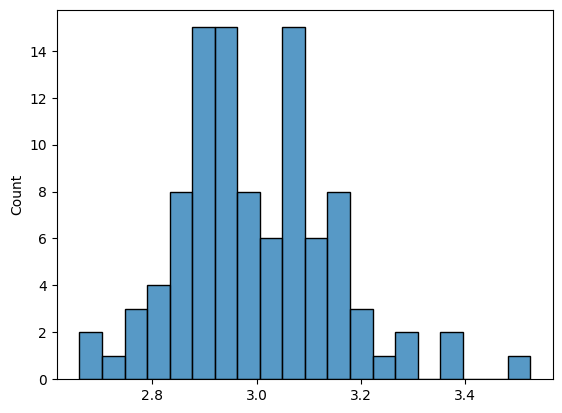

In [62]:
n = 100
N = 100
means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20)

In [ ]:
n = 30 # CLT applies mostly with n greater than 30
N = 100
means = [tips_df.tip.sample(n, replace=True).mean() for i in range(N)]

sns.histplot(means, bins=20)

<details>
    <summary>What is happening when <u><i>N is fixed</i></u> and <u><i>n increases</i></u>?</summary>
    
* `n` (sample size) controls the shape of the distribution. 

* When large enough, it *converges* towards a Normal distribution. This is the Central Limit Theorem. 

</details>



### 3.2) <u>Numerically</u>

❓ Let's verify the Central Limit Theorem computationally ❓
- Compare `tips_mu` with the mean of means
- Compare `tips_sigma` with the standard deviation of the means, but don't forget the $\sqrt n$ adjustment
- Compute the `skewness` of the distribution of the means using `scipy.stats.skew` (should be close to 0)
- Compute the `kurtosis` of the distribution of the means using `scipy.stats.kurtosis`(should be close to 0)


In [77]:
from scipy.stats import skew, kurtosis
mean_of_means = np.mean(means)
print(mean_of_means)
print(tips_mu)

std_of_means = np.std(means)
print("Écart-type des moyennes :", std_of_means)
print("Théorique", tips_sigma / np.sqrt(n))


print("Skewness :", skew(means))
print("Kurtosis :", kurtosis(means))

2.9988319999999997
2.99827868852459
Écart-type des moyennes : 0.14844144898241865
Théorique 0.13836381890011823
Skewness : 0.6064041842336572
Kurtosis : 0.8734745845438816


## 💪  4) Use case: Probabilities of accumulating large tips at the end of a work-day

🤔 Let's pick 100 meals from the dataset, sampling with replacement. What is the probability that the cumulated tips ends up being **greater than 350€**?


1️⃣ Before we answer this question, start by familiarizing yourself with the [**`scipy.stats.norm.pdf`**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) tool: 

❓ Can you plot a Normal Distribution pdf with a mean and standard deviation of your choice?

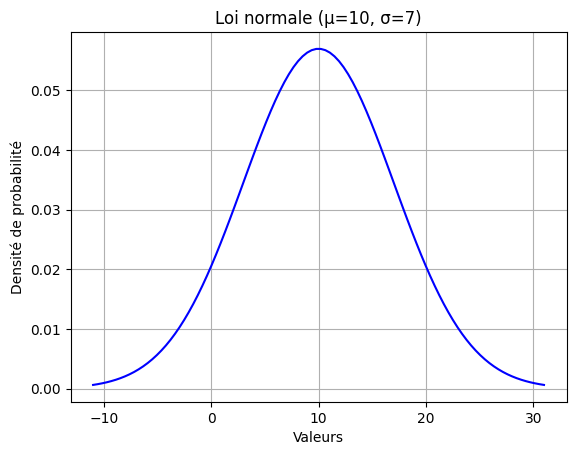

In [88]:
from scipy.stats import norm

mu_example = 10
sigma_example = 7

# Définir l’axe des X (de μ - 3σ à μ + 3σ)
x = np.linspace(mu_example - 3*sigma_example, mu_example + 3*sigma_example, 100)

# Calculer la densité de probabilité (PDF)
y = norm.pdf(x, mu_example, sigma_example)

# Tracer la courbe
plt.plot(x, y, color='blue')
plt.title('Loi normale (μ=10, σ=7)')
plt.xlabel('Valeurs')
plt.ylabel('Densité de probabilité')
plt.grid(True)
plt.show()

🤗 `scipy.stats.norm.pdf` is a **convenient way to draw a Gaussian curve**.

The **probability density function** (_a.k.a._ ***pdf***) of a Normal Distribution with parameters $ \mu $ and $ \sigma $ is defined by:

$$ y = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{1}{2} (\frac{x - \mu}{\sigma})^2}$$

😅 Without this function from Scipy, you would have to define a _Gaussian Probability Density Function_ by yourself to plot the Gaussian Curve.

In [89]:
def gaussian_probability_density_function(mu,sigma, x):
    return 1/(sigma * np.sqrt(2*(math.pi))) * np.exp(- (1/2)*((x-mu)/sigma)**2)

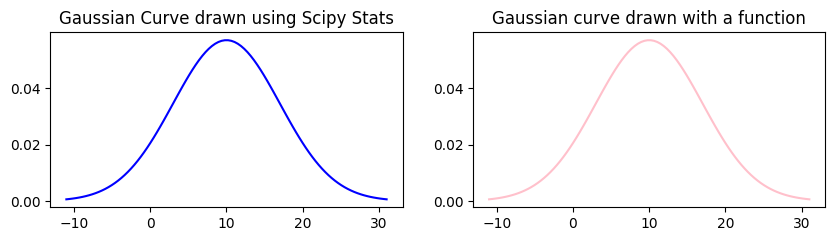

In [90]:
mu_example = 10
sigma_example = 7

# start a figure
plt.figure(figsize=(10,5))

# First subplot :
# Plotting a Gaussian distribution using Scipy Stats
plt.subplot(2,2,1)
plt.plot(x, norm(mu_example, sigma_example).pdf(x), c="blue")
plt.title("Gaussian Curve drawn using Scipy Stats");

# Second subplot :
# Plotting a Gaussian distribution using our own Python function
plt.subplot(2,2,2)
plt.plot(x, gaussian_probability_density_function(mu_example, sigma_example, x), c="pink")
plt.title("Gaussian curve drawn with a function");


2️⃣ Back to our exercise:

<u>The real numbers:</u>

From our Exploratory Data Analysis, we have:
- 244 tips (global population)
- $\mu = 3$ €
- $\sigma = 1.38$ €

<u>Sampling once</u>

- Imagine that we draw a sample of size 100 out of the global population of meals
- We observe the sum of these 100 sample tips is 350€, so the average tip $\mu_X$ is 3.5€ for this sample
- **The operation of drawing a sample is random, therefore the average of these sampled data will also be random**

<u>Distribution of samples</u>

❓ Can you guess what would be the **shape** of the **<u>distribution of the means</u>** of these samples **if we were to <u>draw many other samples</u>** of the same size like this one  

❓ In other words, how do you imagine:
- its shape?
- its mean? (store into a variable called **`mu_expected`**)
- its standard deviation? (store it into a variable called **`sigma_expected`**)

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/ctl.png' width=1000>

<details>
    <summary>💡 Hint:</summary>

🎉 Our sample of size $ n = 100 > 30 $ can be considered large enough to apply the Central Limit Theorem (CLT) 
    
👉 If we were to repeat this experiment (i.e. randomly picking a sample of size 100) an infinite number of times, the distribution of sample mean**s** would become exactly a normal distribution.
    
🔥 **A Gaussian distribution is _FULLY_ characterized by its _mean_ and its _standard deviation_**
    
❓ What are these mean and standard deviation in the context of a Central Limit Theorem ❓ If you forgot about it, scroll up in your notebook! 

</details>

<details>
    <summary>🧑🏻‍🏫 Answer:</summary>

- Shape = Gaussian
- `mu_expected` = `mu`
- `sigma_expected` = `sigma` / $ \sqrt{n} $
</details>

❓ Plot this expected distribution
- On top of it, add the datapoint representing a cumulated tip of 350€ over 100 meals.

Probabilité que la moyenne dépasse 3.5 € : 0.8234


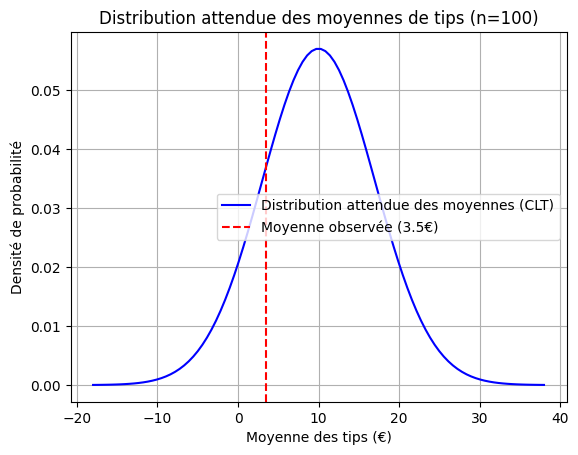

In [97]:
mu_expected = 10
sigma_expected= 7
# YOUR CODE H# Générer les valeurs sur l'axe X (moyennes possibles)
x = np.linspace(mu_expected - 4*sigma_expected, mu_expected + 4*sigma_expected, 100)

# Calculer la densité de probabilité (PDF)
y = norm.pdf(x, mu_expected, sigma_expected)

# Tracer la courbe
plt.plot(x, y, color='blue', label='Distribution attendue des moyennes (CLT)')

# Ajouter le point de notre moyenne observée (3.5 €)
plt.axvline(3.5, color='red', linestyle='--', label='Moyenne observée (3.5€)')
plt.title('Distribution attendue des moyennes de tips (n=100)')
plt.xlabel('Moyenne des tips (€)')
plt.ylabel('Densité de probabilité')
plt.legend()
plt.grid(True)

# Calcul de la probabilité
p_value = 1 - norm.cdf(3.5, mu_expected, sigma_expected)
print(f"Probabilité que la moyenne dépasse 3.5 € : {p_value:.4f}")


👉 For this restaurant, we clearly see that 350 euros of cumulated tips over 100 meals (average tip of 3.50 euros) seems to be is virtually impossible (this probability of this event would be close to zero).

🍔 It is probably a cheap restaurant serving burgers and fries until 4 AM...

We are almost at the end of the challenge!

🔢 Let's denote $ \bar{X} $ the average tip over 100 meals 

* ❓ Compute numerically $ \mathbb{P} ( \bar{X} > 3.50 ) $ and store it in `proba_350` variable ❓
* 📚 You will need the **`cumulative distribution function (cdf)`** from [`scipy.stats.norm`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)

In [99]:
from scipy.stats import norm

# Paramètres du CLT
n = 100
tips_mu = tips_df["tip"].mean()
tips_sigma = tips_df["tip"].std()

# Valeurs attendues selon le CLT
mu_expected = tips_mu
sigma_expected = tips_sigma / np.sqrt(n)

# Calcul de la probabilité que la moyenne dépasse 3.5€
# P(X > 3.5) = 1 - P(X <= 3.5)
proba_350 = 1 - norm.cdf(3.5, mu_expected, sigma_expected)

print(f"Probabilité que la moyenne dépasse 3.5€ : {proba_350:.10f}")

Probabilité que la moyenne dépasse 3.5€ : 0.0001438659


❗️ If we had observed such an amount, we could have deduced with a 99.99% confidence level that the 100 meals selected were ***not randomly sampled*** from the population of meals.

🧪 **Test your code**

In [100]:
from nbresult import ChallengeResult

result = ChallengeResult('probability',
    n=100,
    mu_expected=mu_expected,
    mu=tips_mu,
    sigma_expected=sigma_expected,
    sigma=tips_sigma,
    proba=proba_350
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/02-Data-Toolkit/04-Statistics-Probabilities/data-central-limit-theorem/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 4 items

test_probability.py::TestProbability::test_mu_expected_is_mu PASSED      [ 25%]
test_probability.py::TestProbability::test_probability_is_valid PASSED   [ 50%]
test_probability.py::TestProbability::test_probability_is_very_low PASSED [ 75%]
test_probability.py::TestProbability::test_sigma_expected_value PASSED   [100%]

============================== 4 passed in 0.11s ===============================


💯 You can commit your code:

git add tests/probability.pickle

git commit -m 'Completed probability step'

git push origin master



## ⭐️  5) The `z-score`

<u>**Alternative computation using z-score**</u>

🤔 Imagine you didn't have access to the `SciPy` library (or even to a computer) to compute the probability density function of a custom-made Gaussian distribution numerically. Which workaround could we use to this end?  

💡 Instead of computing a Gaussian distribution with specific mean and sigma, a much more elegant way is to rephrase our problem to use the **`Standard Normal distribution`** $\mathcal N(0,1)$, from which we could read usual values in a **`Standard Statistical table`** 👇

$$ X \sim \mathcal N(\mu,\sigma) \leftrightarrow Y =  \frac{X - \mu}{\sigma} \sim \mathcal N(0,1) $$

<img src='https://wagon-public-datasets.s3.amazonaws.com/data-science-images/math/z-table.png'>

❓First, compute the [z-score](https://en.wikipedia.org/wiki/Standard_score) of your observation, and store it into a variable `z`❓

As a reminder: 
* sample size $ n = 100$
* mean $ = 3.5$ €

> The **`z-score`** of a measured observation $x$ is simply the value of the observation, **measured by the number of standard deviations above or below the mean** of the underlying distribution from which the observation is derived.

$$z={x-\mu  \over \sigma }$$

<details>
    <summary>💡 Hint</summary>

In our case, the value we observe is "3.5€", and the underlying distribution from which this observation was made is the means of samples (of size 100), which is Gaussian/normal with mean $\mu$ and standard deviation $\sigma \over \sqrt{100}$ according to the CLT.

</details>

In [104]:
n = 100
x_obs = 3.5
mu = tips_df["tip"].mean()
sigma = tips_df["tip"].std()

# Calcul du z-score selon le CLT
z = (x_obs - mu) / (sigma / np.sqrt(n))
print(z)

3.626101935200211


❓ Use the standard table above to find the probability we are looking for.

P(Z > 3.63) = 1 - 0.99986 = 0.00014

❓ Double-check this probability with with `scipy.stats.norm` as done previously. Store it into a `proba_z` variable.

In [105]:
from scipy.stats import norm

# Calcul de la probabilité correspondante à ton z-score
proba_z = 1 - norm.cdf(z)

print(f"Probabilité que Z > {z:.2f} : {proba_z:.8f}")

Probabilité que Z > 3.63 : 0.00014387


🧪 **Test your code**

In [106]:
from nbresult import ChallengeResult

result = ChallengeResult('zscore',
    z=z,
    proba=proba_z
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.12.9, pytest-8.3.4, pluggy-1.5.0 -- /Users/simonhingant/.pyenv/versions/3.12.9/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/simonhingant/code/simsam56/02-Data-Toolkit/04-Statistics-Probabilities/data-central-limit-theorem/tests
plugins: anyio-4.8.0, typeguard-4.4.2
collecting ... collected 3 items

test_zscore.py::TestZscore::test_probability_is_valid PASSED             [ 33%]
test_zscore.py::TestZscore::test_probability_is_very_low PASSED          [ 66%]
test_zscore.py::TestZscore::test_z_score_value PASSED                    [100%]

============================== 3 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/zscore.pickle

git commit -m 'Completed zscore step'

git push origin master



🎉 Congratulations if you managed to go through this challenge!

📆 If you couldn't reach this one, we will revisit the `Central Limit Theorem` during the `Recap session`

🥇 If you are a beast, challenge yourself with the optional exercises like `Bayes Theorem`, `Markov Chains` or `Mean without outliers`!